In [62]:
import numpy as np
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
from pprint import pprint as print

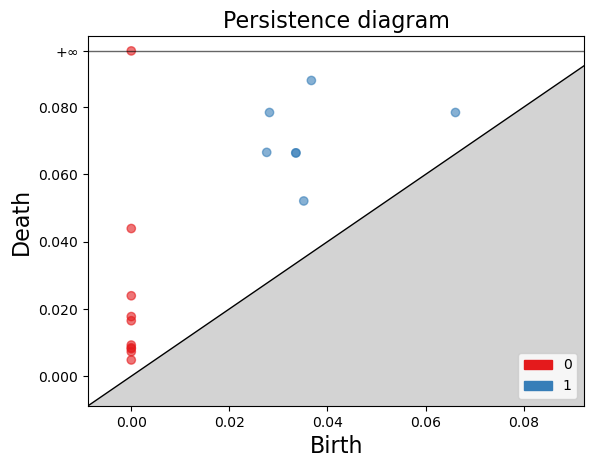

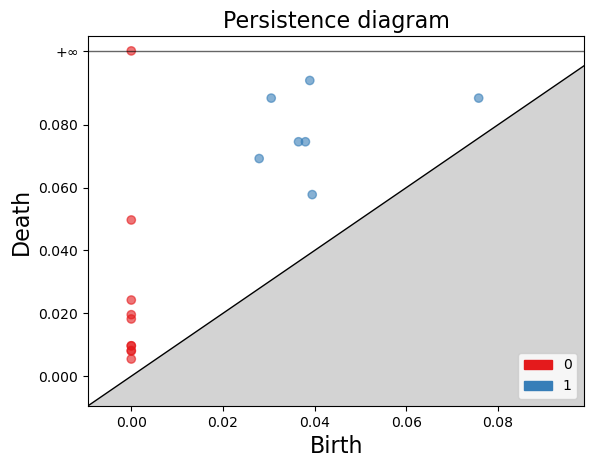

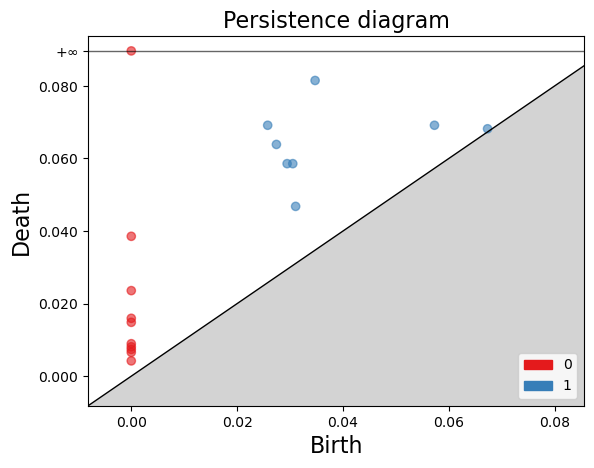

In [66]:
book = 'TheBrothersKaramazov'
data_t0 = pd.read_csv('distances/' + f'{book}_t0.csv')
data_t0 = np.array(data_t0)

data_t1 = pd.read_csv('distances/' + f'{book}_tplus1.csv')
data_t1 = np.array(data_t1)

data_tminus1 = pd.read_csv('distances/' + f'{book}_tminus1.csv')
data_tminus1 = np.array(data_tminus1)

#drop the first row with character names
data_t0 = data_t0[:, 1:]
data_t1 = data_t1[:, 1:]
data_tminus1 = data_tminus1[:, 1:]

rips_complex = gudhi.RipsComplex(distance_matrix = data_t0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag)
plt.savefig('persistence diagrams/' + f'{book}_t0' + ".png")

rips_complex = gudhi.RipsComplex(distance_matrix = data_t1)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag)
plt.savefig('persistence diagrams/' + f'{book}_tplus1' + ".png")

rips_complex = gudhi.RipsComplex(distance_matrix = data_tminus1)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag)
plt.savefig('persistence diagrams/' + f'{book}_tminus1' + ".png")

